In [7]:
import pandas as pd
from tsl.datasets import AirQuality, MetrLA, PemsBay
from sklearn.model_selection import train_test_split
from Metrics import evaluate_datasets

Generated_path = '/Users/paulmagos/Documents/TSGen/Datasets/GeneratedDatasets/PemsBay/'
TeachForcing_path = '/Users/paulmagos/Documents/TSGen/Datasets/TeachForcingDatasets/'

In [8]:
df_PemsBay = PemsBay()
df_PemsBay = df_PemsBay.dataframe()[-1000:].reset_index(drop=True)
df_PemsBay['gen'] = 1
df_PemsBay.columns = df_PemsBay.columns.droplevel('channels')

In [9]:
syn_PemsBay_dopple = pd.read_csv(f'{Generated_path}synteticPemsBayDoppleGANger.csv')
syn_PemsBay_GTM = pd.read_csv(f'{Generated_path}synteticPemsBayGTM.csv')
syn_PemsBay_GTLSTM = pd.read_csv(f'{Generated_path}synteticPemsBayGTLSTM.csv')
syn_PemsBay_GRGN = pd.read_csv(f'{Generated_path}synteticPemsBayGRGN16.csv')
syn_PemsBay_PAR = pd.read_csv(f'{Generated_path}synteticPemsBayPAR.csv')

syn_PemsBay_dopple.columns = [col.split(",")[0].replace("(", "").replace("'", "") if col != 'gen' else col for col in syn_PemsBay_dopple.columns]

syn_PemsBay_dopple['gen'] = 0
syn_PemsBay_GTM['gen'] = 0
syn_PemsBay_GTLSTM['gen'] = 0
syn_PemsBay_GRGN['gen'] = 0
syn_PemsBay_PAR['gen'] = 0

In [10]:
results_df = pd.DataFrame(columns=['dataset', 'model', 'mean_difference',
 'variance_difference',
 'skewness_difference',
 'kurtosis_difference',
 'ks_test',
 'ks_test_p_value',
 'wasserstein_distance',
 'js_divergence',
 'correlation_difference',
 'mmd_linear',
 'mmd_rbf',
 'model_accuracy',
 'model_accuracy_on_Gen',
 'model_accuracy_train_on_both',
 'model_accuracy_train_on_both_Gen'])

In [11]:
df_PemsBay.columns = [str(col) for col in df_PemsBay.columns]
syn_PemsBay_GTM.columns = [str(col) for col in syn_PemsBay_GTM.columns]
syn_PemsBay_dopple.columns = [str(col) for col in syn_PemsBay_dopple.columns]
syn_PemsBay_GTLSTM.columns = [str(col) for col in syn_PemsBay_GTLSTM.columns]
syn_PemsBay_GRGN.columns =  [str(col) for col in syn_PemsBay_GRGN.columns]
syn_PemsBay_PAR.columns =  [str(col) for col in syn_PemsBay_PAR.columns]

In [12]:
out = evaluate_datasets(df_PemsBay, syn_PemsBay_dopple, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "DoppleGANger"
res = pd.DataFrame(out, ["PemsBay DoppleGANger"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [13]:
out = evaluate_datasets(df_PemsBay, syn_PemsBay_PAR, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "PAR"
res = pd.DataFrame(out, ["PemsBay PAR"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [14]:
out = evaluate_datasets(df_PemsBay, syn_PemsBay_GTM, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "GTM"
res = pd.DataFrame(out, ["PemsBay GTM"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [15]:
out = evaluate_datasets(df_PemsBay, syn_PemsBay_GTLSTM, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "GTLSTM"
res = pd.DataFrame(out, ["PemsBay GTLSTM"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [16]:
out = evaluate_datasets(df_PemsBay, syn_PemsBay_GRGN, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "GRGN"
res = pd.DataFrame(out, ["PemsBay GRGN"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [17]:
results_df['tmp'] = (results_df['inception_score_mean'] - results_df['inception_score_std']).abs()


In [18]:
results_df_pemsBay = results_df[results_df['dataset'] == 'PemsBay'].sort_values(by=['tmp'], ascending=False).reset_index(drop=True)
results_df_pemsBay

,dataset,model,mean_difference,variance_difference,skewness_difference,kurtosis_difference,ks_test,ks_test_p_value,wasserstein_distance,js_divergence,...,model_accuracy_on_Gen,model_accuracy_train_on_both,model_accuracy_train_on_both_Gen,correlation_gen,correlation_original,inception_score_mean,inception_score_std,t_stat,t_stat_p_value,tmp
0,PemsBay,GRGN,3.006266,928.459702,2.242821,8.182230,0.386538,6.570864e-12,16.826560,0.623083,...,0.0,1.000,1.000000,0.003018,0.352284,1.988473,0.009002,1.142717,0.118505,1.979471
1,PemsBay,PAR,0.294274,79.318347,2.237077,7.329219,0.447566,9.097078e-32,4.492170,0.674359,...,0.0,1.000,1.000000,0.003060,0.352284,1.958757,0.007486,-0.012592,0.439287,1.951271
2,PemsBay,GTLSTM,3.387736,104.058677,23.820472,699.579466,0.723964,4.573045e-115,7.306644,0.772493,...,0.0,1.000,0.999001,0.001759,0.352284,1.794519,0.598202,1.211793,0.033151,1.196317
3,PemsBay,DoppleGANger,3.699575,73.441294,1.335147,19.433188,0.489206,1.461822e-10,6.245649,0.720934,...,0.0,1.000,0.998000,0.951573,0.352284,0.193440,0.580320,7.147725,0.055638,0.386880
4,PemsBay,GTM,5.272877,109.677091,2.184391,8.086961,0.354105,2.345280e-08,8.196423,0.624023,...,0.0,0.993,0.999001,0.021303,0.352284,0.000000,0.000000,5.391783,0.062548,0.000000


In [19]:
results_df = results_df.sort_values(by=['correlation_gen'], ascending=True).reset_index(drop=True)
results_df

,dataset,model,mean_difference,variance_difference,skewness_difference,kurtosis_difference,ks_test,ks_test_p_value,wasserstein_distance,js_divergence,...,model_accuracy_on_Gen,model_accuracy_train_on_both,model_accuracy_train_on_both_Gen,correlation_gen,correlation_original,inception_score_mean,inception_score_std,t_stat,t_stat_p_value,tmp
0,PemsBay,GTLSTM,3.387736,104.058677,23.820472,699.579466,0.723964,4.573045e-115,7.306644,0.772493,...,0.0,1.000,0.999001,0.001759,0.352284,1.794519,0.598202,1.211793,0.033151,1.196317
1,PemsBay,GRGN,3.006266,928.459702,2.242821,8.182230,0.386538,6.570864e-12,16.826560,0.623083,...,0.0,1.000,1.000000,0.003018,0.352284,1.988473,0.009002,1.142717,0.118505,1.979471
2,PemsBay,PAR,0.294274,79.318347,2.237077,7.329219,0.447566,9.097078e-32,4.492170,0.674359,...,0.0,1.000,1.000000,0.003060,0.352284,1.958757,0.007486,-0.012592,0.439287,1.951271
3,PemsBay,GTM,5.272877,109.677091,2.184391,8.086961,0.354105,2.345280e-08,8.196423,0.624023,...,0.0,0.993,0.999001,0.021303,0.352284,0.000000,0.000000,5.391783,0.062548,0.000000
4,PemsBay,DoppleGANger,3.699575,73.441294,1.335147,19.433188,0.489206,1.461822e-10,6.245649,0.720934,...,0.0,1.000,0.998000,0.951573,0.352284,0.193440,0.580320,7.147725,0.055638,0.386880


In [20]:
df = results_df

# Filter for models that contain "GRGN" in the dataset
# grgn_models = df[df['dataset'].str.contains("GRGN")]
grgn_models = results_df
# Metrics to focus on
metrics_to_compare = ['mean_difference', 'variance_difference', 'ks_test', 'wasserstein_distance', 
                      'js_divergence', 'correlation_difference', 'model_accuracy', 'inception_score_mean']

# Find the minimum for distance-based metrics and the maximum for accuracy/inception-based metrics
best_grgn_models = grgn_models.loc[:, ['dataset', 'model'] + metrics_to_compare].copy()

# For distance-based metrics, lower is better, so we will look for the minimum values.
# For accuracy-based and inception score-based metrics, higher is better.

# Normalize each metric: for distance-based (lower is better), for accuracy-based (higher is better)
for col in ['mean_difference', 'variance_difference', 'ks_test', 'wasserstein_distance', 
            'js_divergence', 'correlation_difference']:
    best_grgn_models[col + '_rank'] = best_grgn_models[col].rank(ascending=True)

# For accuracy and inception score, higher is better
for col in ['model_accuracy', 'inception_score_mean']:
    best_grgn_models[col + '_rank'] = best_grgn_models[col].rank(ascending=False)

# Calculate total rank
best_grgn_models['total_rank'] = best_grgn_models[[col + '_rank' for col in metrics_to_compare]].sum(axis=1)

# Sort by total rank to find the best overall GRGN model
best_grgn_models = best_grgn_models.sort_values('total_rank').reset_index(drop=True)

# Display the best GRGN model
best_grgn_models


,dataset,model,mean_difference,variance_difference,ks_test,wasserstein_distance,js_divergence,correlation_difference,model_accuracy,inception_score_mean,mean_difference_rank,variance_difference_rank,ks_test_rank,wasserstein_distance_rank,js_divergence_rank,correlation_difference_rank,model_accuracy_rank,inception_score_mean_rank,total_rank
0,PemsBay,PAR,0.294274,79.318347,0.447566,4.492170,0.674359,0.386095,0.0,1.958757,1.0,2.0,3.0,1.0,3.0,3.0,3.0,2.0,18.0
1,PemsBay,GRGN,3.006266,928.459702,0.386538,16.826560,0.623083,0.385943,0.0,1.988473,2.0,5.0,2.0,5.0,1.0,2.0,3.0,1.0,21.0
2,PemsBay,GTM,5.272877,109.677091,0.354105,8.196423,0.624023,0.365739,0.0,0.000000,5.0,4.0,1.0,4.0,2.0,1.0,3.0,5.0,25.0
3,PemsBay,DoppleGANger,3.699575,73.441294,0.489206,6.245649,0.720934,0.599576,0.0,0.193440,4.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,26.0
4,PemsBay,GTLSTM,3.387736,104.058677,0.723964,7.306644,0.772493,0.763611,0.0,1.794519,3.0,3.0,5.0,3.0,5.0,5.0,3.0,3.0,30.0


In [21]:
best_grgn_models[best_grgn_models['dataset']=='PemsBay']

,dataset,model,mean_difference,variance_difference,ks_test,wasserstein_distance,js_divergence,correlation_difference,model_accuracy,inception_score_mean,mean_difference_rank,variance_difference_rank,ks_test_rank,wasserstein_distance_rank,js_divergence_rank,correlation_difference_rank,model_accuracy_rank,inception_score_mean_rank,total_rank
0,PemsBay,PAR,0.294274,79.318347,0.447566,4.492170,0.674359,0.386095,0.0,1.958757,1.0,2.0,3.0,1.0,3.0,3.0,3.0,2.0,18.0
1,PemsBay,GRGN,3.006266,928.459702,0.386538,16.826560,0.623083,0.385943,0.0,1.988473,2.0,5.0,2.0,5.0,1.0,2.0,3.0,1.0,21.0
2,PemsBay,GTM,5.272877,109.677091,0.354105,8.196423,0.624023,0.365739,0.0,0.000000,5.0,4.0,1.0,4.0,2.0,1.0,3.0,5.0,25.0
3,PemsBay,DoppleGANger,3.699575,73.441294,0.489206,6.245649,0.720934,0.599576,0.0,0.193440,4.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,26.0
4,PemsBay,GTLSTM,3.387736,104.058677,0.723964,7.306644,0.772493,0.763611,0.0,1.794519,3.0,3.0,5.0,3.0,5.0,5.0,3.0,3.0,30.0


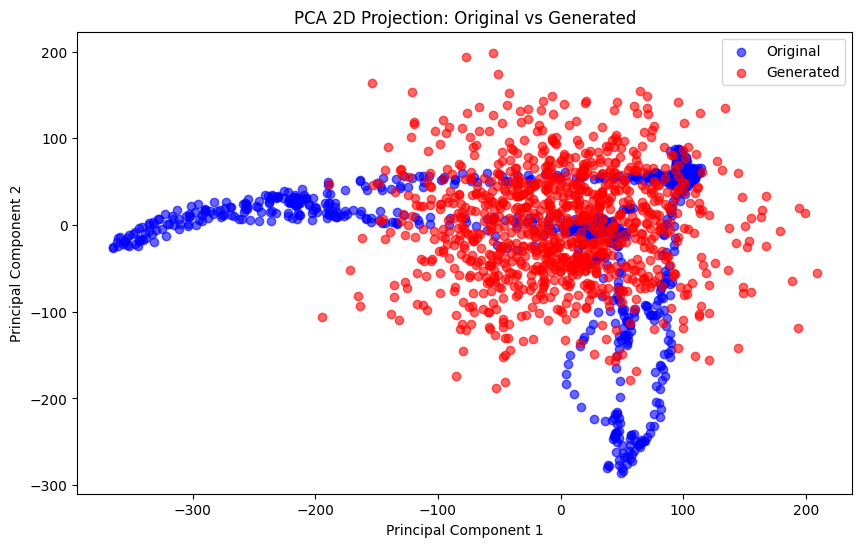

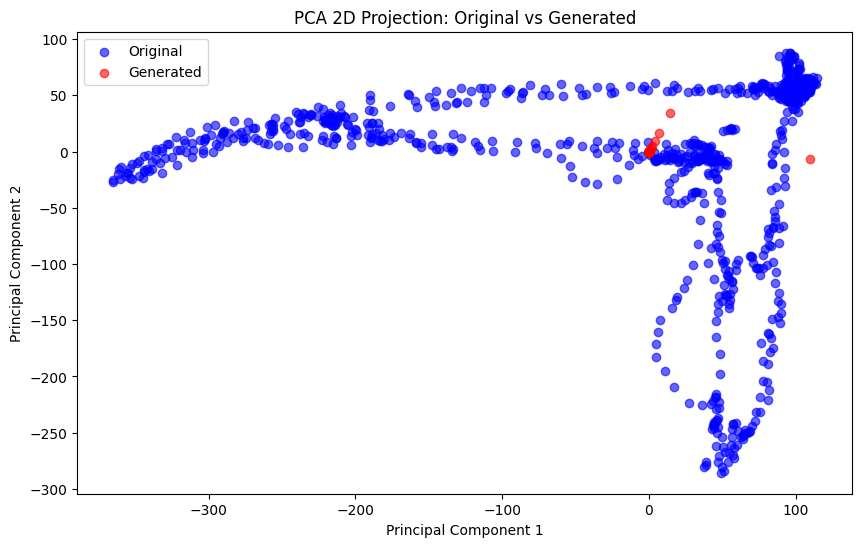

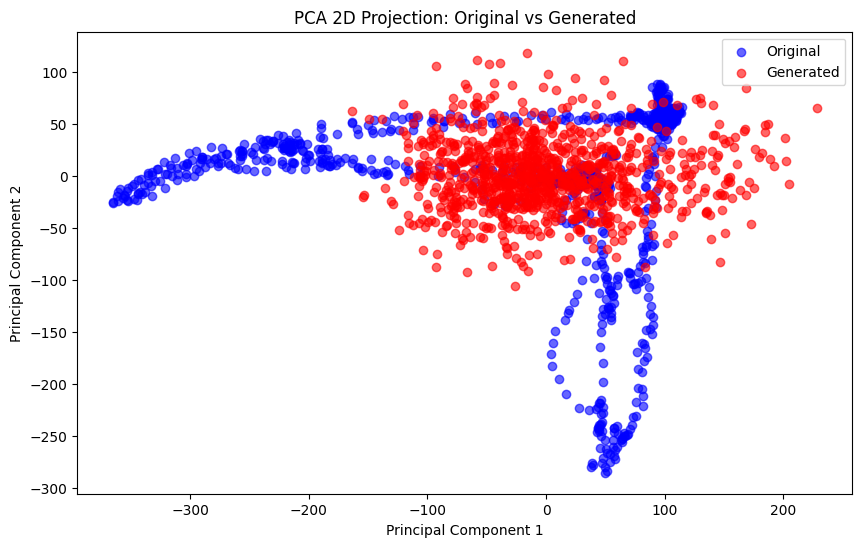

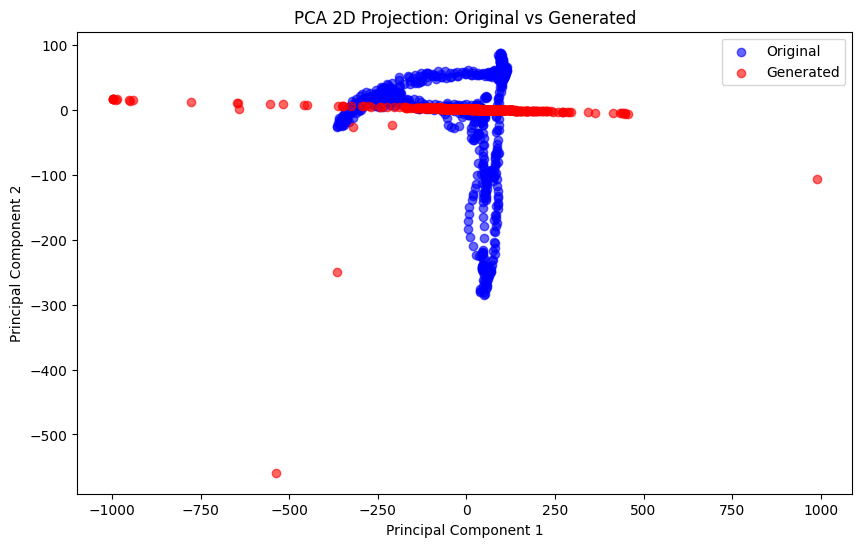

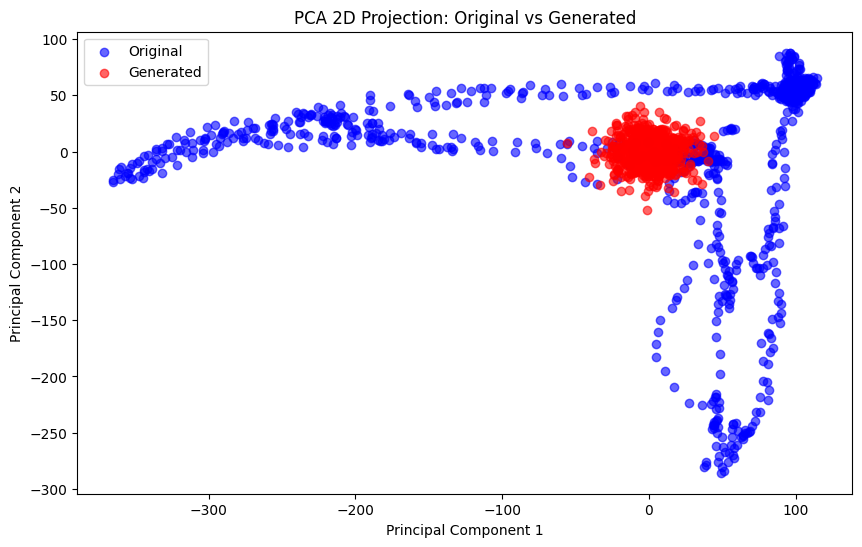

In [22]:
from VisualEval import plot_pca

plot_pca(df_PemsBay, syn_PemsBay_GRGN)
plot_pca(df_PemsBay, syn_PemsBay_GTLSTM)
plot_pca(df_PemsBay, syn_PemsBay_GTM)
plot_pca(df_PemsBay, syn_PemsBay_dopple)
plot_pca(df_PemsBay, syn_PemsBay_PAR)

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


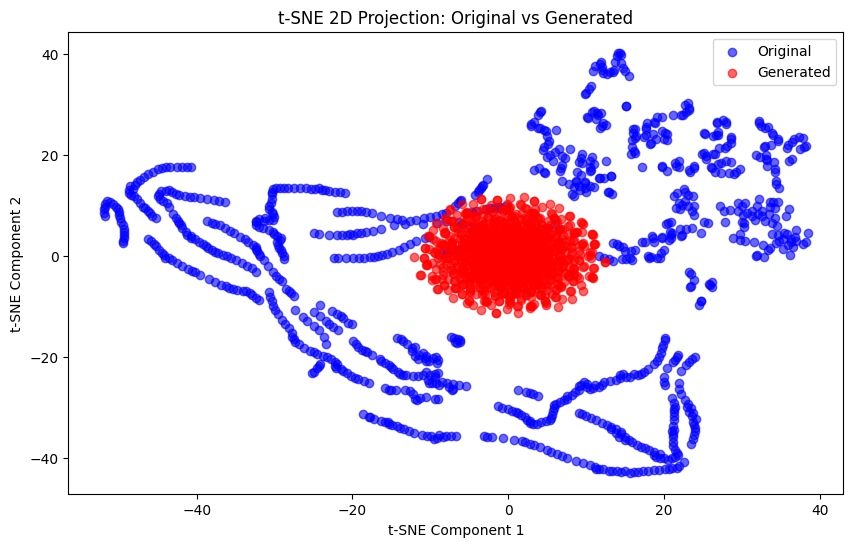

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


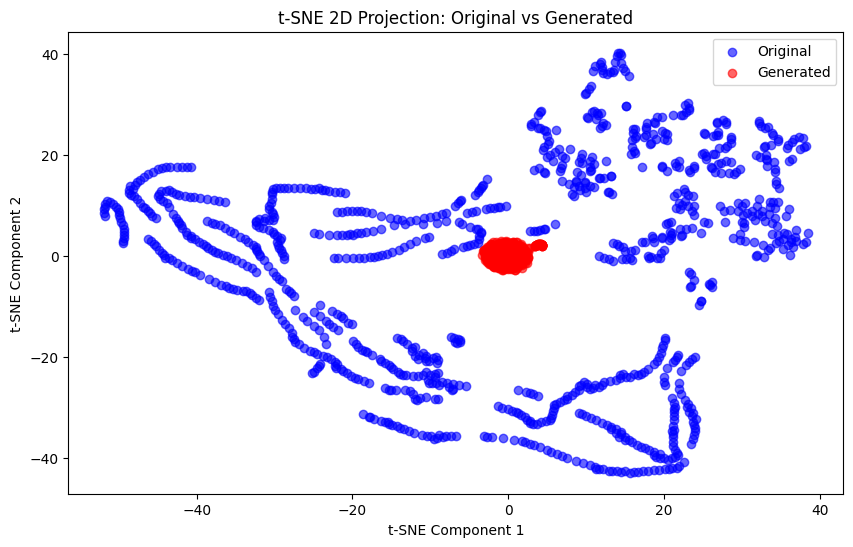

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


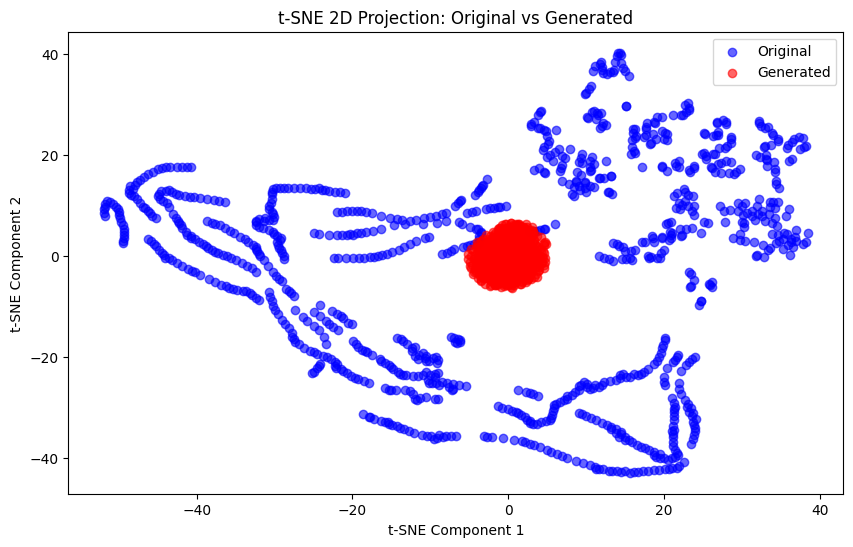

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


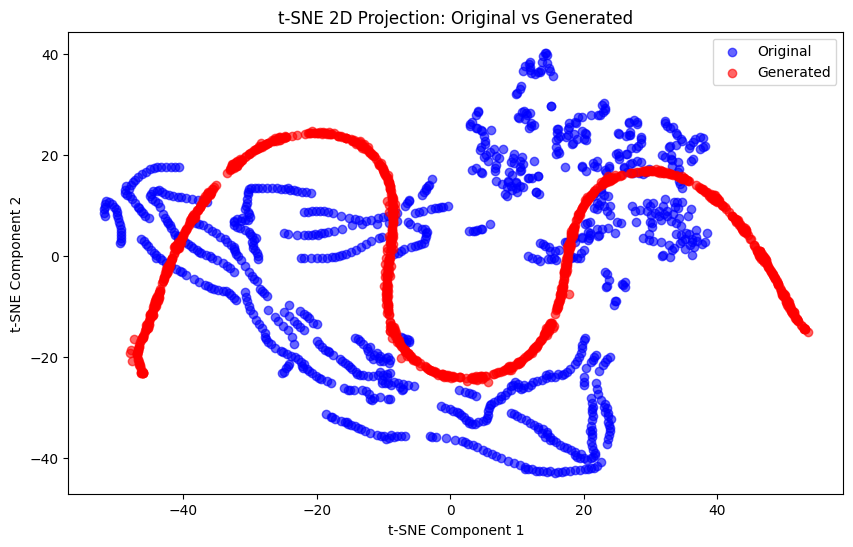

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


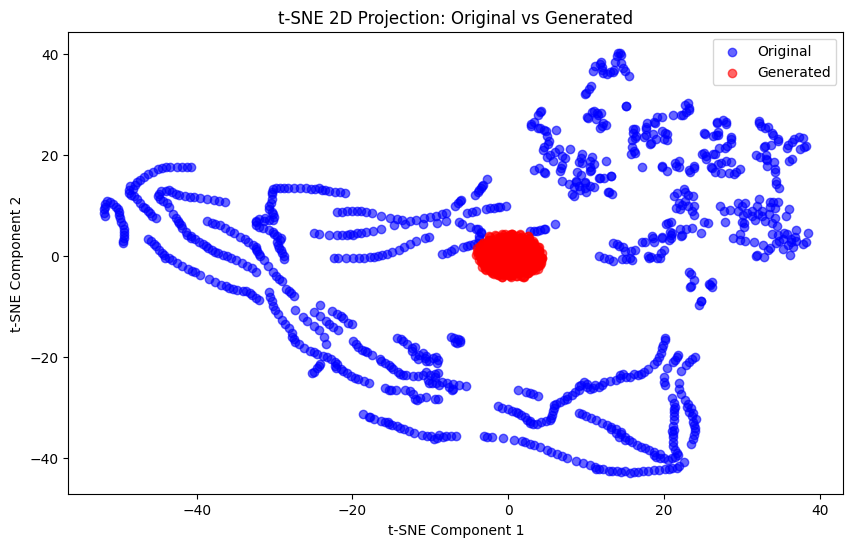

In [31]:
from VisualEval import plot_tsne

plot_tsne(df_PemsBay, syn_PemsBay_GRGN)
plot_tsne(df_PemsBay, syn_PemsBay_GTLSTM)
plot_tsne(df_PemsBay, syn_PemsBay_GTM)
plot_tsne(df_PemsBay, syn_PemsBay_dopple)
plot_tsne(df_PemsBay, syn_PemsBay_PAR)

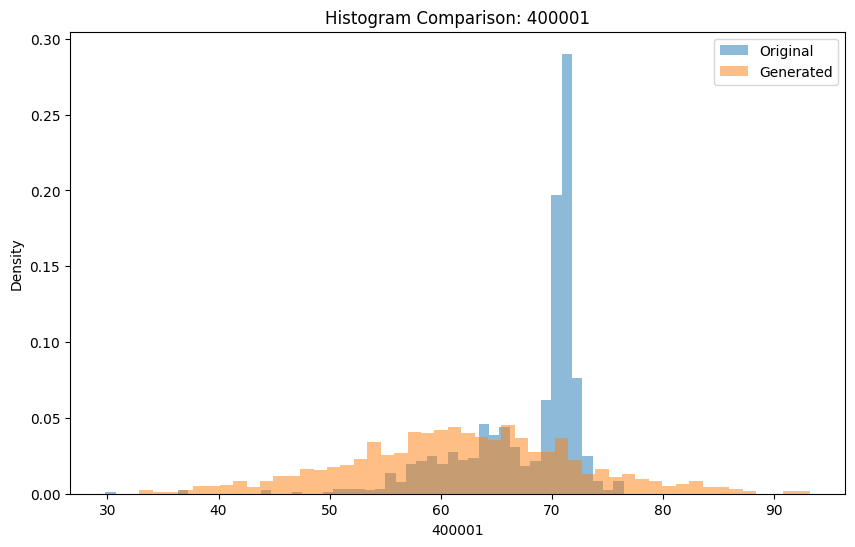

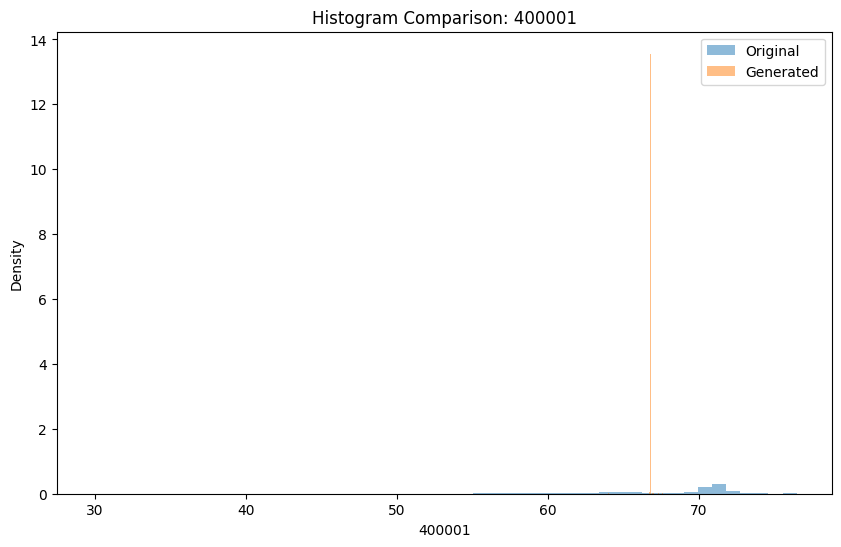

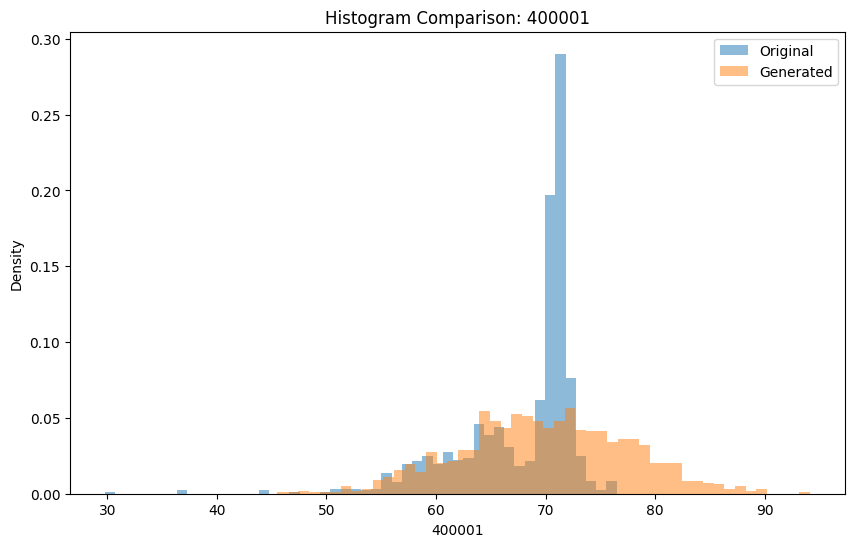

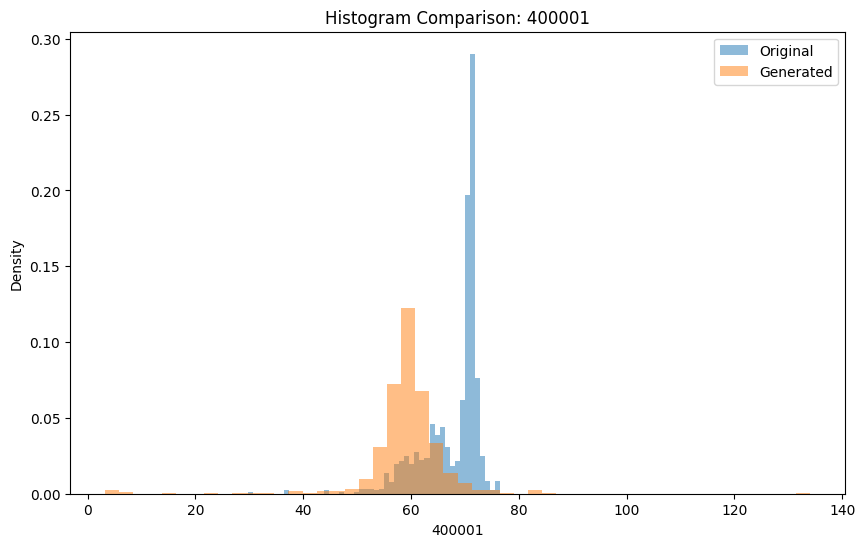

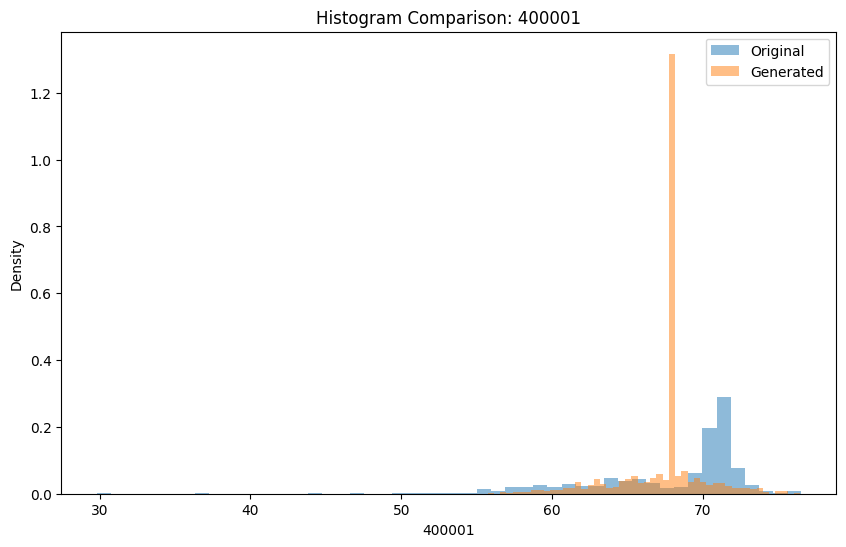

In [24]:
from VisualEval import plot_histograms

plot_histograms(df_PemsBay, syn_PemsBay_GRGN, '400001')
plot_histograms(df_PemsBay, syn_PemsBay_GTLSTM, '400001')
plot_histograms(df_PemsBay, syn_PemsBay_GTM, '400001')
plot_histograms(df_PemsBay, syn_PemsBay_dopple, '400001')
plot_histograms(df_PemsBay, syn_PemsBay_PAR, '400001')

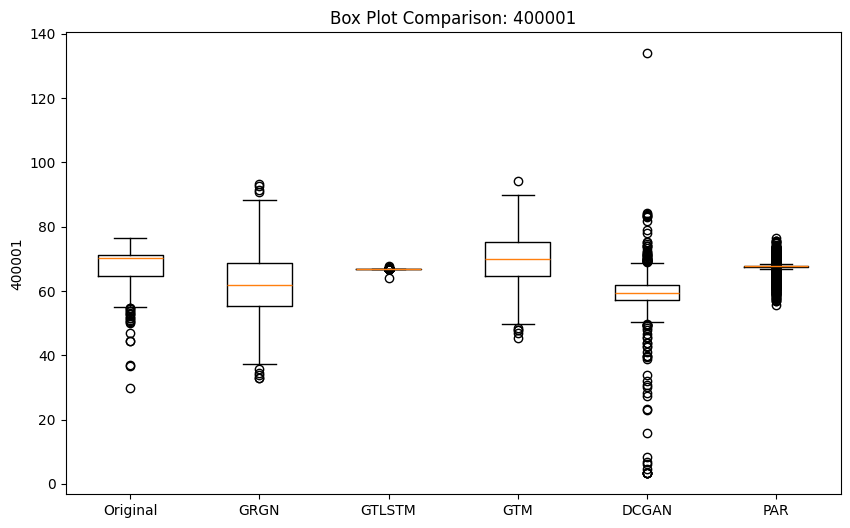

In [25]:
from VisualEval import plot_boxplots_many, plot_boxplots_means, plot_histograms_means

plot_boxplots_many('400001', ('Original', df_PemsBay), 
                   ('GRGN', syn_PemsBay_GRGN), 
                   ('GTLSTM', syn_PemsBay_GTLSTM), 
                   ('GTM', syn_PemsBay_GTM), 
                   ('DCGAN', syn_PemsBay_dopple), 
                   ('PAR', syn_PemsBay_PAR))

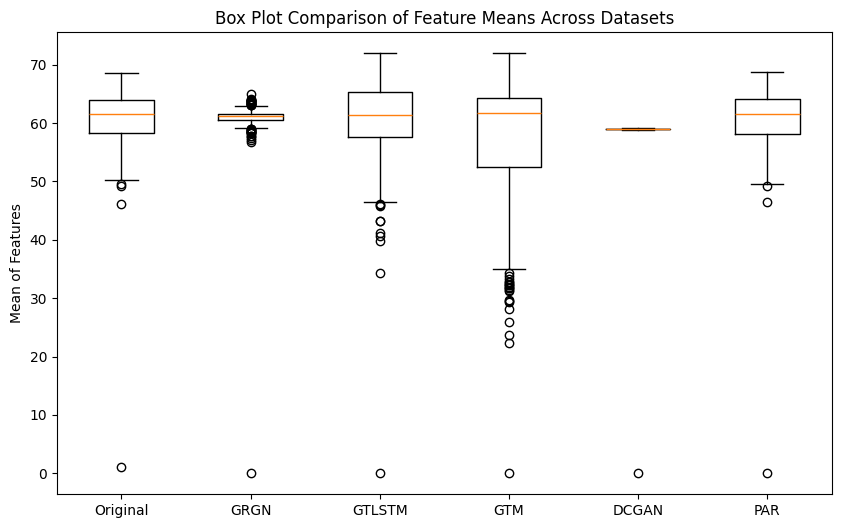

In [26]:
plot_boxplots_means(('Original', df_PemsBay), 
                   ('GRGN', syn_PemsBay_GRGN), 
                   ('GTLSTM', syn_PemsBay_GTLSTM), 
                   ('GTM', syn_PemsBay_GTM), 
                   ('DCGAN', syn_PemsBay_dopple), 
                   ('PAR', syn_PemsBay_PAR))

In [27]:
df_PemsBay

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409526,409528,409529,413026,413845,413877,413878,414284,414694,gen
0,64.000000,62.799999,48.500000,56.400002,61.099998,65.400002,57.599998,65.400002,60.599998,59.200001,...,65.400002,61.000000,58.900002,60.799999,57.900002,60.500000,61.299999,66.099998,62.799999,1
1,63.900002,62.099998,52.099998,56.000000,60.700001,66.099998,57.700001,64.199997,58.599998,58.900002,...,65.900002,61.500000,59.799999,59.700001,59.099998,60.700001,61.000000,67.699997,63.200001,1
2,64.800003,62.299999,55.400002,56.200001,61.799999,66.000000,57.500000,64.099998,60.200001,56.599998,...,65.500000,60.599998,57.700001,61.000000,56.500000,60.799999,60.099998,66.300003,63.200001,1
3,63.900002,61.900002,55.799999,58.099998,63.299999,66.500000,57.900002,64.699997,59.900002,59.400002,...,66.099998,60.900002,58.099998,60.400002,58.299999,61.000000,61.900002,66.599998,63.299999,1
4,64.300003,62.900002,55.000000,57.000000,62.799999,66.699997,58.599998,65.199997,59.200001,59.500000,...,66.000000,60.599998,59.700001,60.200001,58.599998,61.299999,62.000000,66.500000,63.400002,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,70.900002,66.300003,68.400002,61.000000,61.799999,66.900002,66.000000,67.400002,65.400002,69.300003,...,66.800003,64.699997,61.099998,68.400002,61.400002,70.500000,68.199997,71.599998,66.199997,1
996,71.300003,66.599998,68.699997,60.900002,62.000000,66.199997,66.500000,68.199997,64.900002,69.099998,...,67.300003,64.800003,60.799999,69.800003,62.200001,69.400002,68.599998,71.599998,68.400002,1
997,71.400002,66.900002,68.099998,61.099998,62.000000,66.699997,65.800003,68.199997,64.199997,69.099998,...,66.500000,64.599998,61.299999,69.500000,63.799999,70.599998,68.400002,71.599998,66.599998,1
998,72.199997,66.500000,68.000000,61.099998,62.500000,65.800003,67.099998,68.300003,64.000000,67.300003,...,65.900002,64.800003,61.299999,69.599998,64.199997,70.199997,68.699997,71.599998,68.400002,1


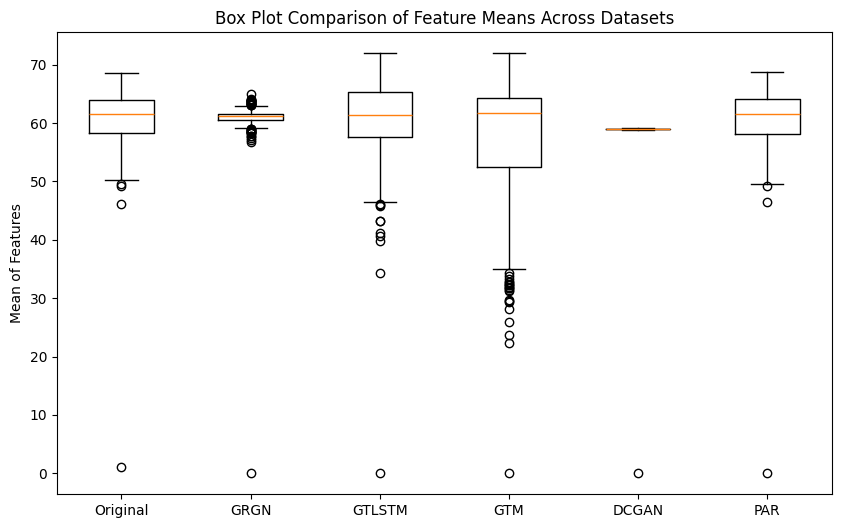

In [28]:
plot_boxplots_means(('Original', df_PemsBay), 
                   ('GRGN', syn_PemsBay_GRGN), 
                   ('GTLSTM', syn_PemsBay_GTLSTM), 
                   ('GTM', syn_PemsBay_GTM), 
                   ('DCGAN', syn_PemsBay_dopple), 
                   ('PAR', syn_PemsBay_PAR))

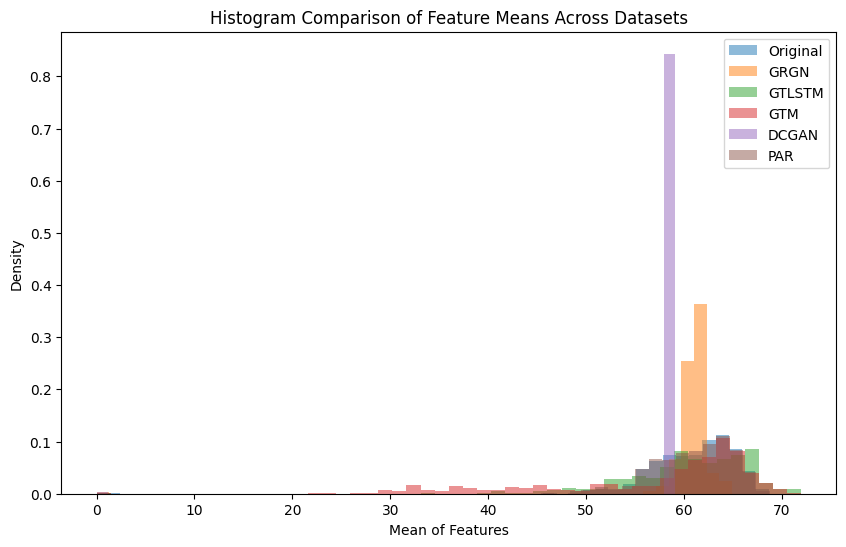

In [29]:
plot_histograms_means(('Original', df_PemsBay), 
                   ('GRGN', syn_PemsBay_GRGN), 
                   ('GTLSTM', syn_PemsBay_GTLSTM), 
                   ('GTM', syn_PemsBay_GTM), 
                   ('DCGAN', syn_PemsBay_dopple), 
                   ('PAR', syn_PemsBay_PAR))